<center>
<img src="https://st.kp.yandex.net/im/kadr/2/2/1/kinopoisk.ru-What-Women-Want-2219360.jpg" width="350"> 


# R для тервера и матстата
## 4.1 Что хочет статистик?


Данный ноутбук является конспектом по курсу «R для теории вероятностей и математической статистики» (РАНХиГС, 2019). Автор ноутбука - [вот этот парень по имени Филипп.](https://vk.com/ppilif) Если у вас для него есть деньги, слава или женщины, он от этого всего не откажется. Ноутбук распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0.](https://creativecommons.org/licenses/by-sa/4.0/) При использовании обязательно упоминание автора курса и аффилиации. При наличии технической возможности необходимо также указать активную гиперссылку на [страницу курса.](https://fulyankin.github.io/R_probability/) На ней можно найти другие материалы. Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние.](https://creativecommons.org/publicdomain/zero/1.0/)

-------------------------------


Двигаемся дальше. В прошлый раз мы поговорили про различные виды сходимости случайных величин. Обычно вы будете вспоминать про них в ситуациях, когда приходится говорить про различные статистические оценки и их свойства. Именно о них пойдёт речь в этой тетрадке. 

Каждый статистик хочет трёх вещей: несмещённости, состоятельности и эффективности. Однако одно дело хотеть этого,совершенно другое - понимать зачем ты этого хочешь. В первой части тетрадки мы попробуем понять зачем этого всего нужно хотеть и посмотреть на то как выглядят эти присловутые несмещённость, состоятельность и эффективность. 

In [119]:
library("ggplot2")  # Пакет для красивых графиков 
library("grid")     # Пакет для субплотов

# Отрегулируем размер картинок, которые будут выдаваться в нашей тетрадке
library('repr')
options(repr.plot.width=4, repr.plot.height=3)

# 1. Любой статистик хочет 

* Несмещённость 
* Состоятельность 
* Эффективность

## 1.1 Про несмещённость 

Первым свойством, которое мы обсудем, станет несмещённость. Начнём с определения. 

__Определение:__  Оценка $\hat \theta$ параметра $\theta$ называется __несмещённой,__ если $E(\hat \theta) = \theta$.

Хорошо. А теперь попробуйте объяснить это бабушке простым языком. Слабо? 

Давайте попробуем разобраться вместе. Для этого нам предстоит отправиться в долину реки Лимпопо. В ней обитает племя аборигенов, которое охотится на мамонтов. Предположим, что процесс порождения данных создавал мамонтов в долине реки Лимпопо следующим образом: он сгерерировал 10 тысяч мамонтов со средним весом 300 кг и стандартным отклонением 100 кг. 

In [1]:
x_mamont = rnorm(10^4, mean=300, sd=100) # вся генеральная совокупность 
x_mamont[1:5]

[1] 282.7815 435.7341 398.6510 352.3327 320.1006

Каждый день племя стабильно убивает одного мамонта. От среднего веса убитого мамонта зависит то насколько сильно племя будет голодать. Конечно же, аборигенам хотелось бы знать о добыче заранее. Для этого в племени держат трёх шаманов. Все три шамана живут на вершине одинокой горы, с которой стабильно видна сотня мамонтнов, случайно забредшая в долину реки Лимпопо. Все три шамана обладают ясным взором и могут определить вес мамонта с одного взгляда.

Шаман Одэхингум ([паблик вконтакте](https://vk.com/topic-29582719_26068566) говорит, что это переводится как лёгкое колебание воды) уверен в своём взоре и без толики сомнения каждый раз сообщает вождю, что вес мамонта, которого поймает племя будет 

$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$


Шаман Пэпина (что означает это имя, можно посмотреть в том же паблике) также обладает хорошим взором. Вместе с этим он обладает комплексом неполноценности. Он боится сделать слишком оптимистичный прогноз. Поэтому он считает среднее по сотне мамонтов и немного занижает его на волшебную константу

$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n}.$$

Шаман Апониви среди трёх шаманов больше всего не уверен в себе. Он сильнее всех коректирует свой прогноз

$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n}.$$

Итак, у нас есть три шамана-оценивателя. Давайте разбираться какими свойствами эти шаманы обладают. Посмотрим на истиный средний вес мамонтов по генеральной совокупности. 

In [120]:
mean(x_mamont)

[1] 299.3558

Попробуем извлечь подвыборку из сотни мамонтов и посмотреть что будет происходить с ней. Ясное дело, раз на раз не приходится. Иногда вес мамонта оказыватся гораздо больше среднего. Иногда меньше.

In [123]:
x_sample = sample(x_mamont, size = 100) 

mean(x_sample) # Раз на раз не приходится :3

[1] 297.0304

Ну что-ж! Давайте оценивать веса мамонтов. Предположим, что шаманы работают на протяжении 200 дней. Давайте посмотрим насколько хорошо они в течение этого периода будут помогать вождю. 

In [124]:
th_od = rep(0,200)
th_pe = rep(0,200)
th_ap = rep(0,200)

for(i in 1:200){
    x_sample = sample(x_mamont, size = 100) 
    th_od[i] = mean(x_sample)
    th_pe[i] = mean(x_sample) - 4200/100
    th_ap[i] = mean(x_sample) - 5*(100+1)/100    
}

Одэхингум, пользуясь своей формулой в среднем будет угадывать математическое ожидание веса мамонта. Вождь ему за это может сказать только спасибо. Оценка оказывается несмещённой. 

In [125]:
mean(th_od)

[1] 298.9544

Пэпина, используя свой подход будет очень сильно занижать вес. То есть, используя свою формулу для прогнозирования добычи охотников, шаман будет систематически ошибаться. Его оценка оказывается смещённой.

In [126]:
mean(th_pe)

[1] 256.9544

Оценка Апониви также окажется смещёной, но гораздо меньше. 

In [127]:
mean(th_ap)

[1] 293.9044

![](https://upload.wikimedia.org/wikipedia/commons/3/32/Densityvsbox.png)

In [135]:
df = data.frame('theta' = c(th_od, th_pe, th_ap),
                'who' = c(rep('Odahingum',200), rep('Pappina',200), rep('Opanovi',200)))
head(df,5)

theta,who
304.7187,Odahingum
298.1863,Odahingum
309.0638,Odahingum
312.8581,Odahingum
312.7131,Odahingum


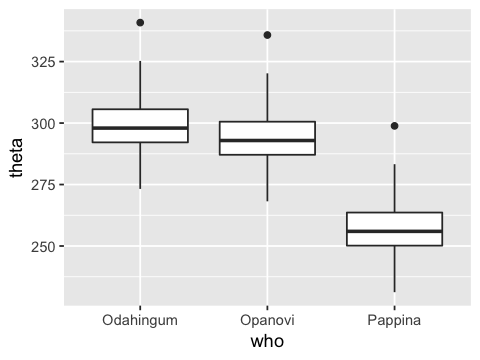

In [140]:
ggplot(df, aes(who, theta)) + geom_boxplot()

Можно попробовать построить виолончель. Это то же самое, что и ящик с усами, но покрасивше. 

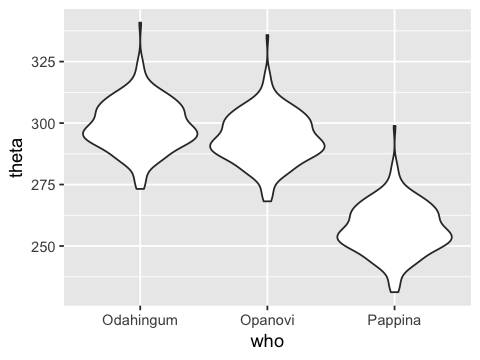

In [141]:
ggplot(df, aes(who, theta)) + geom_violin()

Что мы видим? Последний ящик с усами мдвинут довольно сильно вниз по отношению к остальным. Это и есть то самое смещение в оценивателе. Второй ящик сдвинулся вниз совсем малость. 

Давайте попробуем посмотреть как ведут себя распределения оценок шамонов в динамике, при росте числа наблюдений.

<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2019/gif_creator/animation_boxplot.gif" width="500"> 
</center>

Что мы видим? 

* Красный ящик соответствует несмещённому оценивателю. 


$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i.$$

Он остаётся в районе $300$, то есть в районе реального среднего значения. Дисперсия оценки при росте числа наблюдений падает и ящик сжимается. Это обычное адекватное поведение оценки. 

* Синий ящик соответствет асимптотически несмещенной оценке.

$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n}.$$

В нём есть константа, на которую шаман коректирует свой прогноз. Чем больше наблюдений оказалось под взором шамана, тем сильнее он уверен в своём предсказании и тем сильнее он уменьшает коректировку. Такая оценка при маленьком числе наблюдений даёт довольно сильное смещение. При росте $n$ смещение уменьшается. На картинке это вырожается в том, что синий ящик постепенно движется вправо, к реальному среднему и положению аналогичному красному ящику. 

* Лиловый ящик соотвествует смещённой оценке. 

$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n}.$$

Из-за корекции, ящик всегда находится немного левее истиного значения. Мы ошибаемся в этой ситуации при любом числе наблюдений.

Хех. Шаманы. Детский сад, скажите вы. Подавай нам что-нибудь из бизнеса. Окей, договорились. Давайте предположим, что шаманы прогнозируют не вес мамонта, а то на какую сумму в среднем будут наступать страховые случаи. Ясное дело, что наш  бюджет на статистические исследования довольно сильно ограничен. И ежедневно мы можем собирать информацию только от ограниченного числа респондентов. Если мы стабильно будем на основе этой информации получать смещённую оценку страхового покрытия, то вместо получения прибыли в среднем, мы легко можем оказаться банкротами. 

__Ещё раз, ещё раз:__ несмещённость это свойство оценки при фиксированном размере выборки $n$. Оно означает, что ошибка "в среднем", то есть при систематическом использовании оценки, отсутствует. Это довольно хорошее свойство, но не обязательное. Достаточно, чтобы смещение оценки уменьшалось с ростом объёма выборки. Такая оценка называется асимптотически несмещённой. 

## 1.2 Про состоятельность 

Второй свойство это состоятельность! 

__Определение:__  Оценка $\hat \theta$ параметра $\theta$ называется __состоятельной,__ если $\hat \theta \to \theta$ по вероятности при росте $n$. 

Это бабушке объяснить попроще. Давайте посмотрим что будет происходить при увеличении высоты горы с нашими шаманами. Чем выше гора, тем больше мамонтов с неё видно. Пусть первые $200$ дней шаманы видят по $100$ мамонтов, вторые $200$ дней по $200$ мамонтов и так до $10000$. Давайте посмотрим что будет происходить с их ошибками.

In [142]:
# Пусть число мамонтов растёт от 100 до 10000
# Посмотрим какую среднюю ошибку будет совершать в таком случае каждый шаман 

th_od_c = rep(0,100)
th_pe_c = rep(0,100)
th_ap_c = rep(0,100)

for(j in seq(100,10000,100)){
    
    # пусть каждое число мамонтов наблюдается по 200 дней
    # тогда мы сможем смотреть на среднюю ошибку при каждой численности
    th_od = rep(0,200)
    th_pe = rep(0,200)
    th_ap = rep(0,200)

    for(i in 1:200){
        x_sample = sample(x_mamont, size = j) 
        th_od[i] = mean(x_sample)
        th_pe[i] = mean(x_sample) - 4200/j
        th_ap[i] = mean(x_sample) - 5*(j+1)/j    
    }
    
    # смотрим на среднюю ошибку в течение 200 дней
    th_od_c[j/100] = mean(th_od)
    th_pe_c[j/100] = mean(th_pe)
    th_ap_c[j/100] = mean(th_ap)
}

Ошибка первого шамана в среднем никак не меняется. Он продолжает в среднем попадать в средний вес мамомнтов. Дисперсия оценки падает с увеличением числа наблюдений. Если вы добросовестно изучали предыдущие блокноты, то у вас сейчас во всю флэшбэчит на сходимость по вероятности. Да, это именно она. Эта оценка состоятельна. 


$$ \hat \theta_{od} = \frac{1}{n}\sum_{i=1}^{n} x_i \to \theta $$



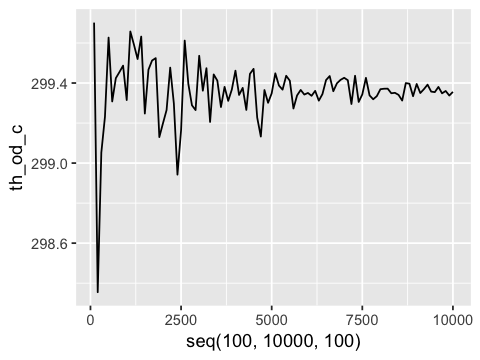

In [143]:
qplot(seq(100,10000,100), th_od_c, geom='line')

У второго шамана аналогичная ситуация. Поправка при $n \to \infty$ схлопывается в ноль, а оценка сходится по вероятности к истиному параметру

$$ \hat \theta_{pe} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{4200}{n} \to \theta.$$

Обратите внимание, что с движением $n$ к бесконечности поправка падает. Это означает, что при большом числе мамонтов, систематическая ошибка шамана будет маленькой. Такие оценки называются асимптотически несмещёнными. 

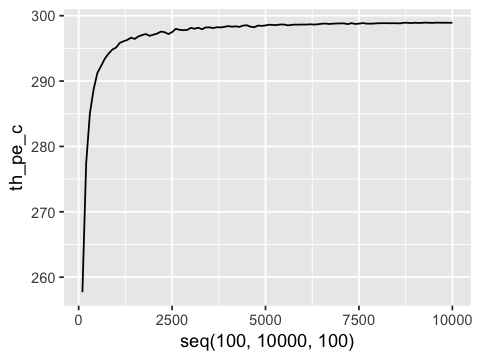

In [144]:
qplot(seq(100,10000,100), th_pe_c, geom='line')

Самые большие проблемы у третьего шамана. Из-за его поправки оценка сходится, но не туда куда надо. При $n \to \infty$ мы приходим не к истиному значению параметра, а в другую точку 

$$ \hat \theta_{ap} = \frac{1}{n}\sum_{i=1}^{n} x_i - \frac{5 \cdot (n+1)}{n} \to \theta - 5.$$

Мало того, что оценка смещена, так ещё и нет смысла расширять выборку. 

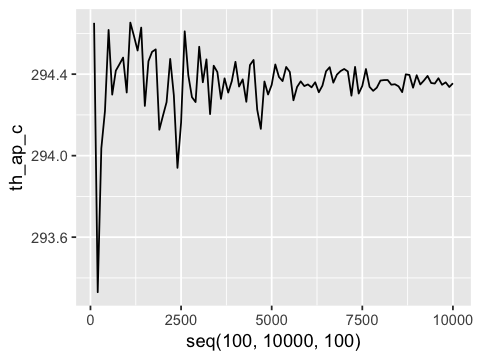

In [145]:
qplot(seq(100,10000,100), th_ap_c, geom='line')

__Ещё раз, ещё раз:__ нельзя путать состоятельности и несмещённость. Состоятельность означает, что мы при расширении выборки приходим к истине. Несмещённость, что мы при фиксированном размере выборке в среднем не ошибаемся. Состоятельность это то свойство оценки, за которое стоит бороться. Без этого свойства нет никакого смысла использовать оценку. 

## 1.3 Про оба свойства сразу

Если оценка оказалась состоятельной, это не означает что она несмещённая. Эти два свойства независимы друг от друга и возможны самые разные их комбинации. Давайте попробуем взять случайную величину $X \sim N(\mu,1)$ и попробуем придумать такие оценки для параметра $\mu$, которые будут обладать разными комбинациями из свойств. 


|  $\hat \mu$   |несмещённая          | смещённая             |
|---------------|---------------------|-----------------------|
|состоятельная  |                     |                       |
|несостоятельная|                     |                       |

* Несмещённая и состоятельная - среднее! По ЗБЧ сходится к $\mu$ по вероятности. И с математическим ожиданием всё окей. Вы на лекциях тыщу раз считали. 
* Состоятельная и смещённая - скоректированное среднее. Это как раз оценка второго шамана. При больших $n$ поправка умирает, это обеспечивает состоятельность. При фиксированных $n$ она есть и это вносит систематическую ошибку. 
* Несостоятельная, несмещенная - любое наблюдение. Давайте какого бы объёма не оказалась наша выборка, всегда будем оценивать $\mu$ только по первому наблюдению. Такая оценка окажется несмещённой. При этом она будет несостоятельной, так как мы при увеличении выборки никак не можем на неё повлиять. 
* Смещённая и несостоятельная - любая ересь, которая пришла вам в глову. Например $arctg(\bar x)$. 


|  $\hat \mu$   |несмещённая          | смещённая             |
|---------------|---------------------|-----------------------|
|состоятельная  |        $\bar x$     |   $\bar x + ^1/_n$    |
|несостоятельная|        $x_1$        |   $arctg(\bar x)$     |


Попробуем сделать то же самое с распределением $X \sim U[0; a]$.

|  $\hat a  $   |несмещённая          | смещённая             |
|---------------|---------------------|-----------------------|
|состоятельная  |    $2 \bar x$       |    $x_{max}    $      |
|несостоятельная|     $2 x_1$         |    $x_1^{x_2} -8$     |


## 1.4 Достаточное условие Чебышёва

__Теорема:__ Если оценка $\hat \theta$ несмещенная и её дисперсия $Var(\hat \theta) \to 0$ при увеличении выборки, то эта оценка состоятельная.  

Хочу ещё раз подчеркнуть ваше внимание, что это работает только тогда, когда оценка несмещённая. Например, для третьего шамана, дисперсия оценки падает при $n \to \infty$, но из-за смещения оценка сходится не к истине, а к истине минус пять. 

# 2. Кексы про выборку 

Иногда бывают ситуации, когда мы с теоретической точки зрения хорошо подобрали оцениватели, но при этом наши оценки всё равно обладают плохими свойствами. Такое происходит, когда мы не очень внимательно относимся к предпосылкам. Например, большая часть оценок хорошо работает только при репрезентативной, случайной, выборке. Если мы будем собирать её не очень случайно, то оценки перестанут быть хорошими. 

В этом разделе находится пара кексов, связанных с выборкой. Если вы раньше никогда не встречались с этими кексами, подумайте самостоятельно пару минут над тем что было сделано не так, и только потом читайте ответ.

## Первый кекс

__Проблема:__ В Америке был интересный казус, когда журнал "Литерари Дайджест" опросил аж 10 миллионов человек насчёт выборов президента. Это огросное количество респондентов: для достоверной статистики хватило бы 2-3 тысячи правильно собранных овтетов. Журнал предсказал победу ресупбликанцу Альфу Лэндону со значительным перевесом (60 на 40), а выборы выиграл демократ Франклин Рузвельт - как раз с таким же перевесом, но в обратную сторону. Как думаете, почему? 


__Ответ:__ Когда стали разбираться, как же так, выяснилось, что выборка нерепрезентативна, большинство подписчиков журнала были республиканцами, а в попытке сгладить это несоответсвие журнал рассылал бюллетени по телефонным книгам. Но не учел забавного факта: телефоны были доступны только среднему и высшему классу общества, а это были, в основном, республиканцы. Выборка оказалась смещённой и оценки, получившиеся на выходе не обладали хорошими свойствами. 

* Выбор! Журнал «Литерари Дайджест» опросил $10$ млн. человек 
* Предсказал победу республиканцу Альфу Лэндону($60$ на $40$)
* Выборы выиграл демократ Франклин Рузвельт (как раз с таким же перевесом, но в обратную сторону)
* Как думаете, почему?

<center> 
<img src="https://odysseyonline-img.rbl.ms/simage/https%3A%2F%2Faz616578.vo.msecnd.net%2Ffiles%2F2016%2F09%2F12%2F636093062941659772-1250537044_tumblr_nkr8qtg0XA1rlo1q2o1_1280.jpg/2000%2C2000/%2Fw0p1yvcB3gtK%2FFy/img.jpg"  width="650"> 

## Второй кекс 

* Часто вконтакте можно увидеть такие посты

<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_4/research.png" width="550">
</center>

* Как считаете, какие проблемы возникнут у исследователя с выборкой? Удастся ли ему получить хорошие оценки? 



__Ответ:__ Возникает штука, которая называется проблема самоотрбора. Анкету, которая вывешена таким образом, заполнит далеко не каждый человек. Полученная в конечном итоге выборка не будет случайной. Она охватит лишь какой-то конкретный сегмент друзей пользователя. 

Более того, заполнение анкеты может само по себе зависеть от какой-то скрытой переменной. Это приведёт к смещённым и несостоятельным результатам даже если удастся выйти за круг друзей и добиться случайного заполнения анкеты. Например, в данном случае  маловероятно, что люди с высокой зарплатой решат потратить своё время на заполнение подобной анкеты. Их время слишком дорого стоит. Анкету в основном заполнят безработные студенты, залипающие вконтакте. В конечном итоге, имея в выборке мало примеров людей с высокой зарплптой, мы будем исследовать не совсем то явление, которое собирались исследовать в начале и сделаем некоректные выводы. 

## Третий кекс 

* Фермер хочет оценить урожайность пшеницы от количества внесённых удобрений. Для этого он проводит эксперимент по выращиванию пшеницы. Он делит поле на две части. На правую он вносит удобрения, на левую нет. Как думаете, у него получится адекватно оценить влияние удобрений на урожайность?

<center>
<img src="https://abbiewatchesstuff.files.wordpress.com/2014/11/interstellar_movie_still_2.jpg" width="550">
</center>

__Ответ:__  Снова выборка делается неслучайно. Мы можем столкнуться с ситуацией, когда правая часть поля более солнечная, чем левая. И тогда справа растения будут хорошими, а на левой нет. Мы, при этом спишем это на успешное использование удобрений, хотя на самом деле удобрения тут были ни при чём. Исследуемые нами переменные могут легко зависеть от какой-нибудь третьей переменной. Из-за этого оценки могут получиться плохими. При дизайне эксперимента надо стремиться предусмотреть такие ситуации и избежать их. Например, в случае фермера, надо рандомизировать использование удобрения на поле. Те кусты, где оно было использовано, можно пометить ленточкой, чтобы не забыть. 

## Четвёртый кекс

Во время Второй Мировой войны американские военные собрали статистику попаданий пуль в фюзеляж самолёта. По самолётам, вернувшимся из полёта на базу, была составлена карта повреждений среднестатистического самолёта. С этими данными военные обратились к статистику Абрахаму Вальду с вопросом, в каких местах следует увеличить броню самолёта.
Что посоветовал Абрахам Вальд и почему?

<br>

<center>
<img src="https://www.navolne.life/images/post/352600-1513406705.jpg" width="300">
</center>

__Ответ:__ Броню следует увеличить в тех местах, где меньше всего следов от пуль. Отсутствие следов пуль в некотором месте означает, что попадание в это место приводит к тому, что самолёт не возвращается на базу.

Если говорить глобально и немного с натяжкой, то в этом кексе мы сталкиваемся с проблемой отсутсвия негативных примеров. Самолёты, которые были сбиты, не вернулись на базу. 

Такая проблема часто возникает перед рекомендательными системами. В случае рекомендации товаров у нас есть матрица каких-то событий, например, матрица покупок. В ней будут присутствовать только положительные примеры, то есть случаи, когда человек что-то купил: ему понравился товар, пользователь был готов потратить на это деньги, и в итоге потратил деньги. В то же время в матрице не будет примеров товаров, про которые точно известно, что человек никогда это не купит. Невозможно понять: человек не видел этот товар и поэтому не купил, или он его не купил, потому что он ему не нравится. Приходится искать выходи из этой ситуации и придумывать разные специальные модели. 

<br>

<center>
<img src="http://blog.nua.kharkov.ua/wp-content/uploads/2017/09/Fig-1-Analogy-between-bullet-free-plane-critical-areas-and-hypomutated-proteins.png" width="800">
</center>

## Мораль

К смещению оценок и несостоятельности могут приводить разные причины. При исследовании надо обязательнос следить за репрезентативностью выборки. Данные нужно собирать аккуратно.

# 3.  Про сравнение оценок между собой и эффективность 

Предположим, что у нас есть две оценки. Они обе классные, несмещённые и состоятельные. Возникает вопрос: а какую взять то? Для того, чтобы выбрать, вводят свойство эффективности. 

__Определение:__ Оценка $\hat \theta$ параметра $\theta$ называется __эффективной в некотором классе оценок,__ если её дисперсия, $Var(\hat \theta)$ в этом классе оценок при заданном объёме выборке минимальна. 

Зачем это нужно? Для того, чтобы доверительные интервалы для оценок были как можно уже, то есть для того, чтобы оценка была как можно точнее.

Давайте посмотрим на следующий пример. Пусть мы оценили методом максимального правдоподобия параметр $\theta$ для равномерного распределения $U[0; \theta]$ двумя методами. Методом моментов и методом максимального правдоподобия. Получилось, что: 

$$\hat \theta_{MM} = 2 \bar x, \qquad \qquad \hat \theta_{ML} = \frac{n+2}{n} \cdot x_{max}$$

Какую из этих двух оценок вы бы стали использовать? Какая лучше? Обе оценки являются несмещёнными и состоятельными. 

Ну давайте посмотрим! Можно руками посчитать, что:

$$ E(\hat \theta_{MM} - \theta)^2 = \frac{\theta^2}{3n} \qquad \qquad E(\hat \theta_{ML} - \theta)^2 = \frac{2 \theta^2}{n(n+1)}$$

Получится, что при $n = 1,2$ дисперсии совпадут. При $n >2$ оценка максимального правдоподобия будет обладать меньшей дисперсией. Доверительные интервалы, основанные на ней окажутся короче, а наши прогнозы точнее.  Давайте нарисуем картинки для этих двух оценок. 

In [146]:
x_general = runif(10^6, 0, 10)             # генеральная совокупность 

In [147]:
# Будем делать подвыборки в 100 наблюдений и строить оценки. 
n_obs = 10^4

th_mm = rep(0,n_obs)
th_ml = rep(0,n_obs)

for(i in 1:n_obs){
    x_sample = sample(x_general, size = 100) 
    th_mm[i] = 2*mean(x_sample)
    th_ml[i] = (100+2)/100*max(x_sample)
}

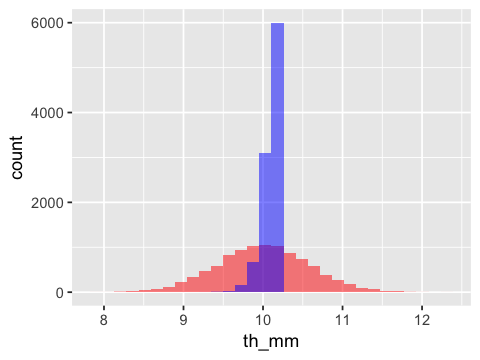

In [148]:
ggplot(data.frame(th_mm, th_ml)) +
    geom_histogram(aes(x=th_mm),bins=30, alpha=0.5, fill='red')+
    geom_histogram(aes(x=th_ml),bins=30, alpha=0.5, fill='blue')

При выборке объёма сто, у оценки максимального правдоподобия, действительно будет меньший разброс. По сравнению с оценкой метода моментов, она более крутая. И на практике следовало бы выбрать её. Когда у оценки самый маленький разброс в классе всех несмещённых оценок, её называют эффективной. 

__Ещё раз, ещё раз:__ эффективность позволяет строить более узкие доверительные интервалы и впоследствие более точные прогнозы. 

## 4. Про баланс между смещением и разбросом

Обычно чтобы сравнить оценки между собой, считают их среднеквадратическую ошибку, $MSE$ (mean squered error): 

$$
MSE(\hat \theta) = E((\hat \theta - \theta)^2)
$$

Эта штука представляет из себя среднюю ошибку, которую мы совершаем, если используем оценку параметра $\hat \theta$. Чем меньше такая ошибка, тем лучше наша оценка. Именно поэтому обычно оценки между собой сравнивают в смысле среднего квадратического. Говорят, что одна оценка не хуже другой, если 

$$
E((\theta_1 - \theta)^2) \le E((\theta_2 - \theta)^2).
$$

Важно отметить, что в классе всех возможных оценок не существет наилучшей в смысле среднего квадратического подхода. Из-за этого говорят о наилучших оценках в каких-то классах. В нашем случае, мы говорим об эффективных оценках в классе несмещённых оценок.  

Давайте немного поанализируем $MSE$. Пусть для удобства $E(\hat \theta) = \tilde \theta$. Тогда

\begin{multline}
MSE(\hat \theta) = E[(\hat \theta - \theta)^2] = E[(\hat \theta - \tilde \theta + \tilde \theta - \theta)^2] = E[(\hat \theta - \tilde \theta)^2] + 2 \cdot (\tilde \theta - \theta) \cdot E[\hat \theta -  \tilde \theta] + E(\tilde \theta - \theta)^2 = \\ = Var(\hat \theta) + 0 + (\tilde \theta - \theta)^2 = Var(\hat \theta) + bias(\hat \theta)^2.
\end{multline}

Мы взяли ошибку и выяснили, что её можно записать в виде суммы из двух составляющих.

* __разброс (variance)__  или дисперсия оценки, 
* квадрат __смещения (bias)__ или математическое ожидание разности между истинным значением параметра и оценкой.

Понятно, что разброс характеризует возможное разнообразияе оценок (из-за случайности нашей выборки), а смещение говорит о том насколько хорошо наша оценка настроена на целевое значение параметра. Если внимательно посмотреть на это уравнение, можно увидеть кучу полезностей: 

1. Если смещение нулевое, MSE совпадает с дисперсией ошибки. Мы можем сравнивать несмещённые оценки между собой в контексте привычной для нас эффективности.
2. Если оценка несмещенная, ошибка равна дисперсии. Если дисперсия стремится к нулю при $n \to \infty$, наша ошибка также сходится к нулю. Получается условие Чебышева, которое мы использовали на семинарах для доказательства состоятельности разных оценок. 
3. В голове рождается мысль, что можно попробовать поймать какой-то баланс между смещением и разбросом и за счёт этого добиться у оценок более интересных свойств. Обычно этим активно занимаются в машинном обучении. Возможно, мы об этом в будущем ещё поговорим. А пока остановимся. 

Часто разброс и смещение иллюстрируют такими картинками.

<center>
<img src="https://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/images/bias_variance/bullseye.png" width="500"> 
</center>

Если провести аналогию, что оценивание – это игра в дартс, то самый лучший игрок будет иметь небольшое смещение и разброс – его дротики ложатся кучно «в яблочко», если у игрока большое смещение, то они сгруппированы около другой точки, а если большой разброс, то они ложатся совсем не кучно.